<a href="https://colab.research.google.com/github/surajsrivathsa/applied_statistics/blob/main/Accelerated_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install sweetviz
!pip install -U pandas-profiling
!pip install autoviz

     |████████████████████████████████| 15.1MB 301kB/s 
     |████████████████████████████████| 81kB 8.1MB/s 
  Found existing installation: tqdm 4.41.1
    Uninstalling tqdm-4.41.1:
      Successfully uninstalled tqdm-4.41.1
     |████████████████████████████████| 245kB 9.2MB/s 
     |████████████████████████████████| 61kB 6.0MB/s 
     |████████████████████████████████| 81kB 7.0MB/s 
     |████████████████████████████████| 3.2MB 14.6MB/s 
     |████████████████████████████████| 1.1MB 34.4MB/s 
     |████████████████████████████████| 296kB 32.6MB/s 
  Created wheel for phik: filename=phik-0.11.2-cp37-none-any.whl size=1107413 sha256=8cdbed75384ce252194107caca580acda0bb921ec39141550b29609faf9d2f58
  Stored in directory: /root/.cache/pip/wheels/c0/a3/b0/f27b1cfe32ea131a3715169132ff6d85653789e80e966c3bf6
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp37-none-any.whl size=27085 sha256=cc58013a4b0fa1d55cc1dd9b0006abe1380c5ac1cd57366350a58a141cabda28
  Stored in directory: /root/.ca

In [2]:
import pandas as pd
import sweetviz as sv
from pandas_profiling import ProfileReport
from autoviz.AutoViz_Class import AutoViz_Class

In data analysis cycle we do 
* Descriptive statistics to get bigger picture of data
* Inferential stats to get distribution of dataset
* Multivariate analysis to check trends and corelations
* Perform EDA
* Data quality and cleansing roles
* Feature engineering

In [3]:
df = pd.read_csv("http://creditriskanalytics.net/uploads/1/9/5/1/19511601/hmeq.csv")
df.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


* BAD: 1 = applicant defaulted or seriously deliquent , 0 = loan paid
* LOAN: Amount of loan requested
* MORTDUE: Amount of existing mortgage on the house
* VALUE: Value of current property
* REASON: Debtconsolidation, home improvement
* JOB: Occupational categories
* YOJ: Years at present job
* DEROG: number of major derogtory reports, tells whether you have previously filed for any bankruptcy or had any bad payments
* DELINQ: number of delinquent credit lines
* CLAGE: age of oldest credit line in months
* NINQ: number of recent credit enquireies
* CLNO: number of credit lines
* DEBTINC: debt to income ratio

This is a home equity loan and not home loan. Its a loan on top of your home. 
Lets say the market value of the home is 1 million and home has 100K Loan. You can go to banks and ask for loans upto remaining 900K. Tap into its equity

Use sweet base and call analyze method give target feature. Target feature is not mandatory. But if given it shows how target feature influences other variables. If not given you get univariate stats on all variables

                                             |          | [  0%]   00:00 -> (? left)


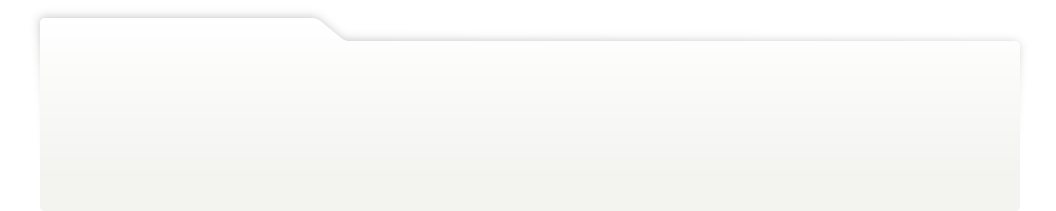
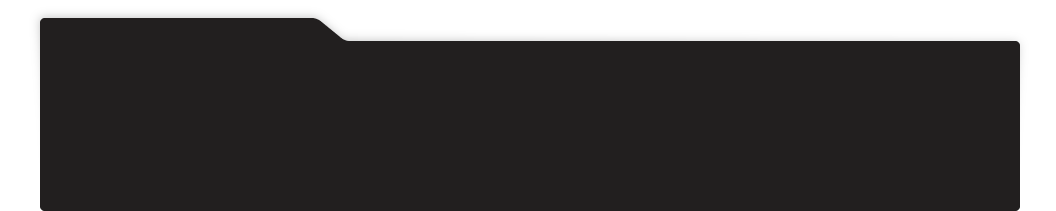
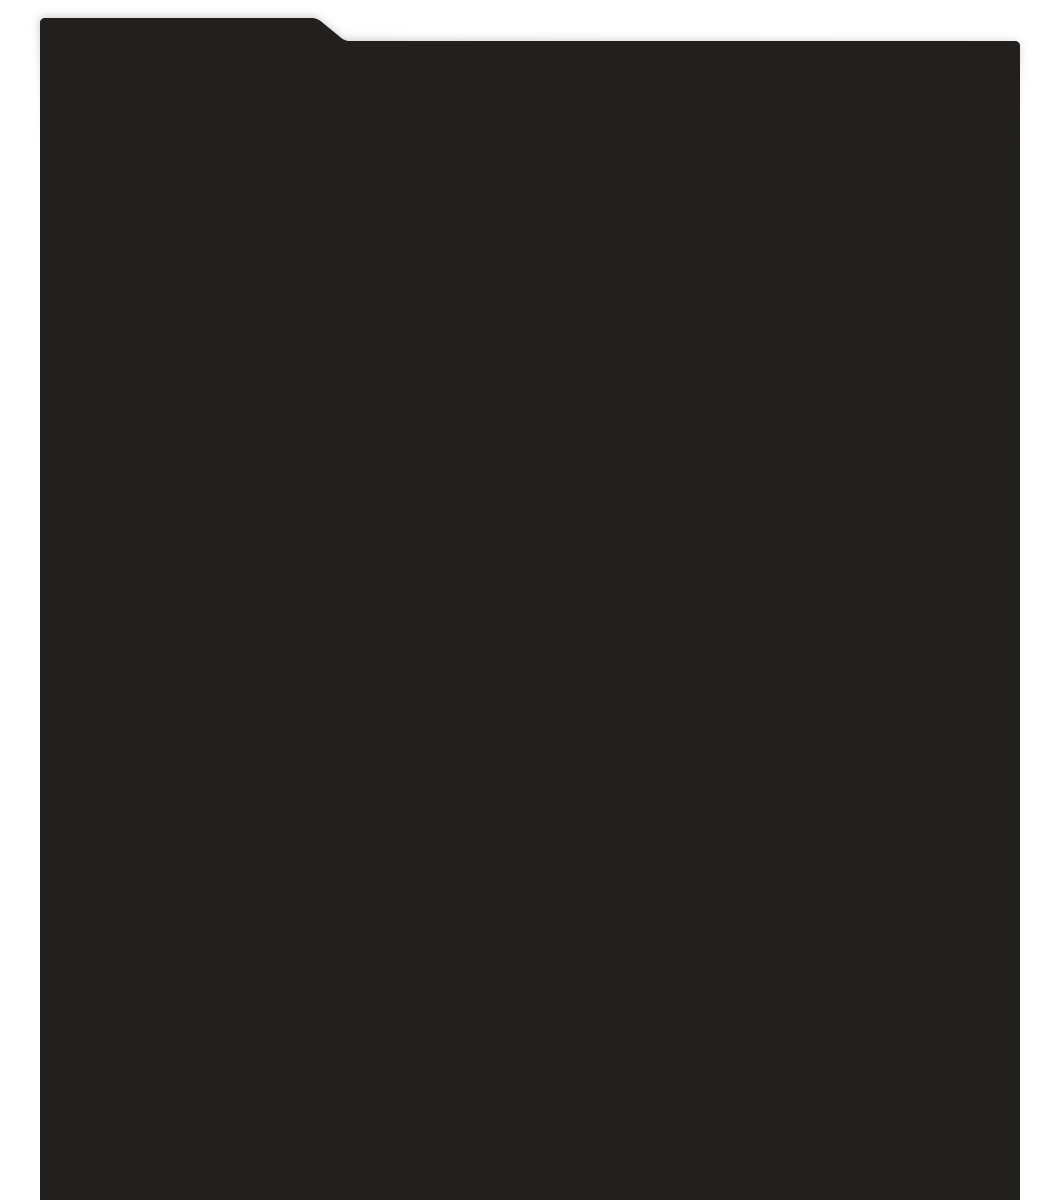
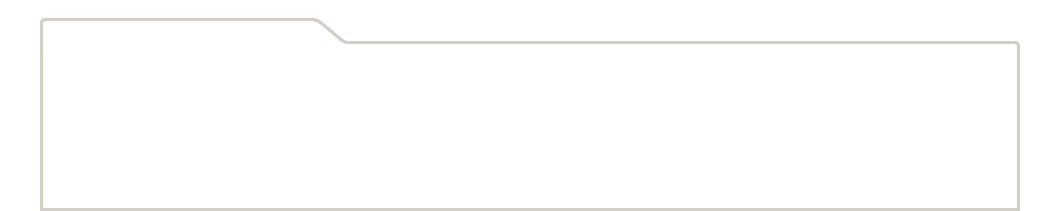
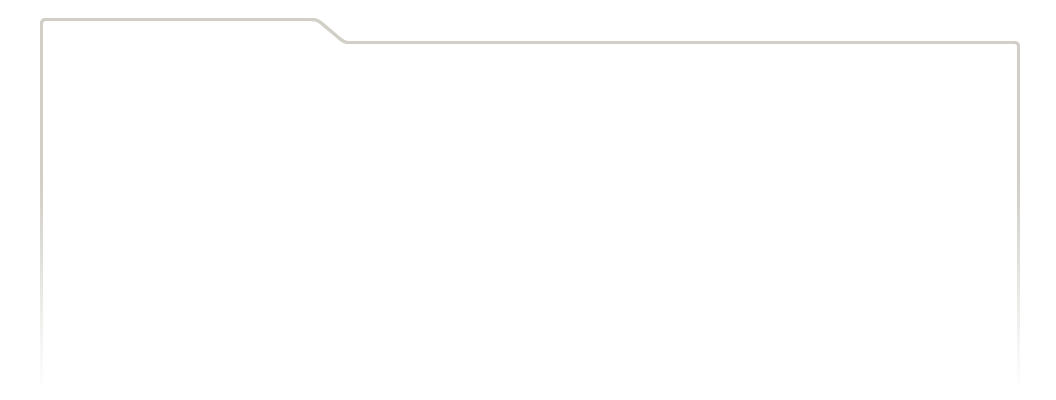
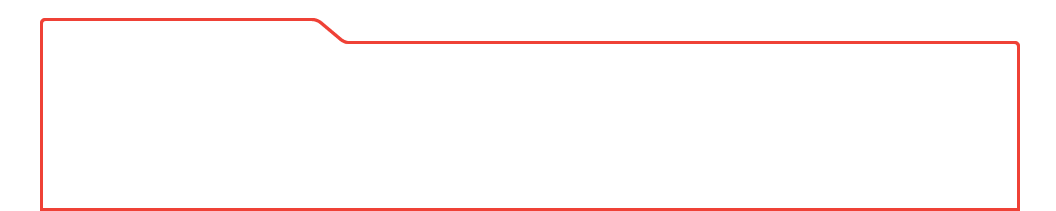
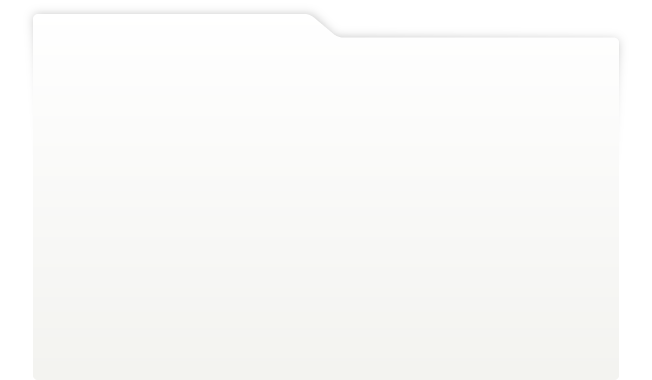
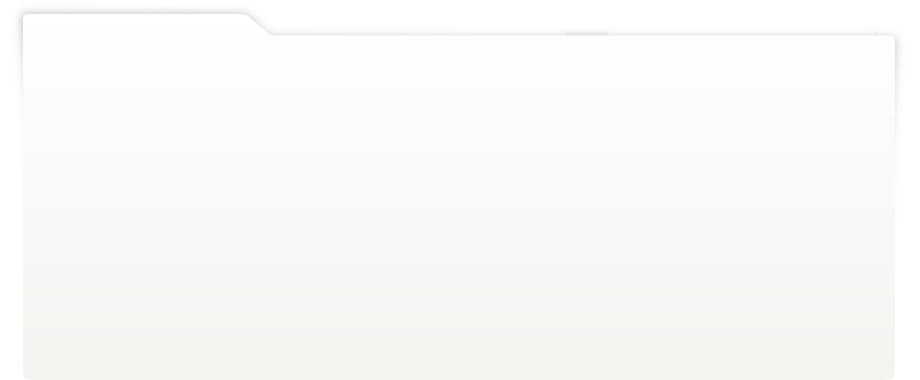
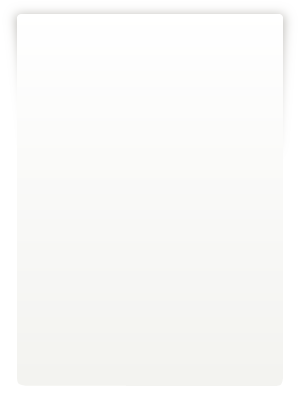
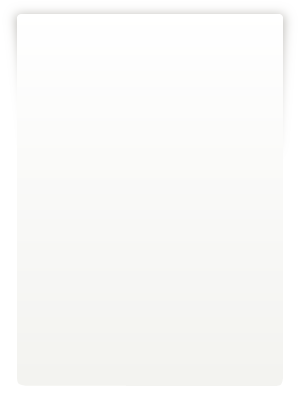
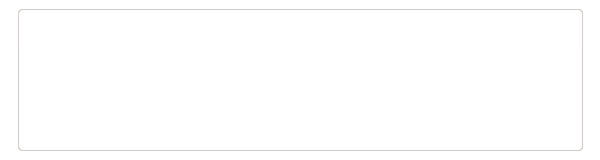
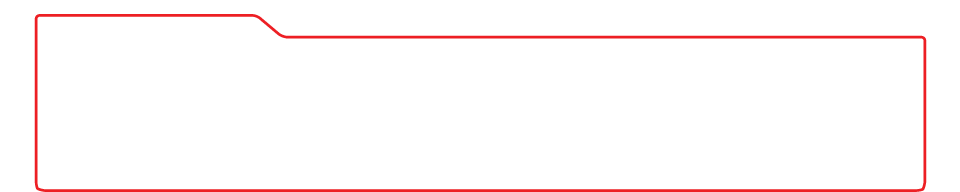
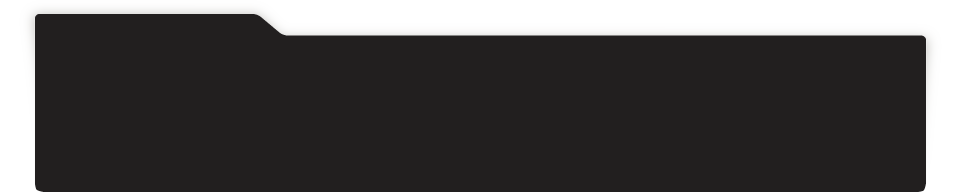
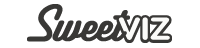
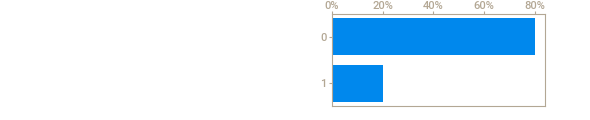
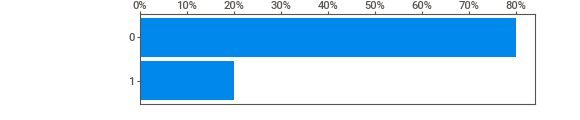
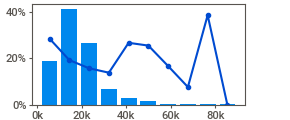
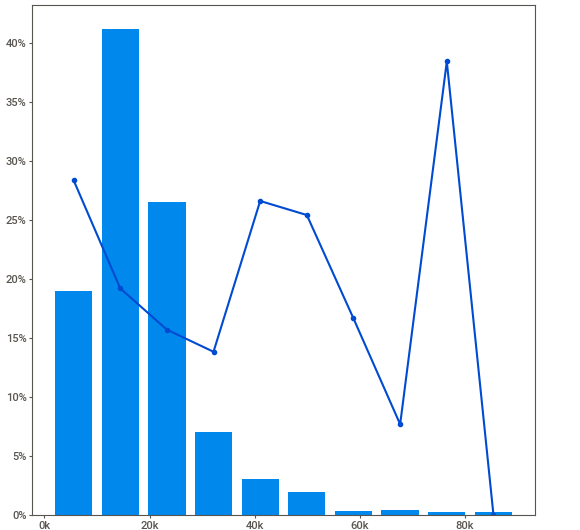
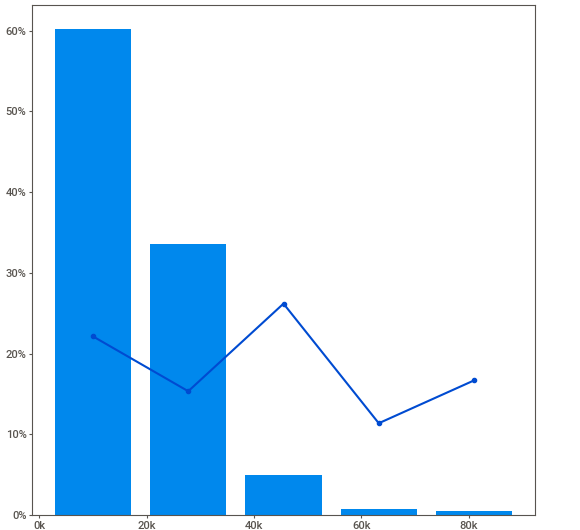
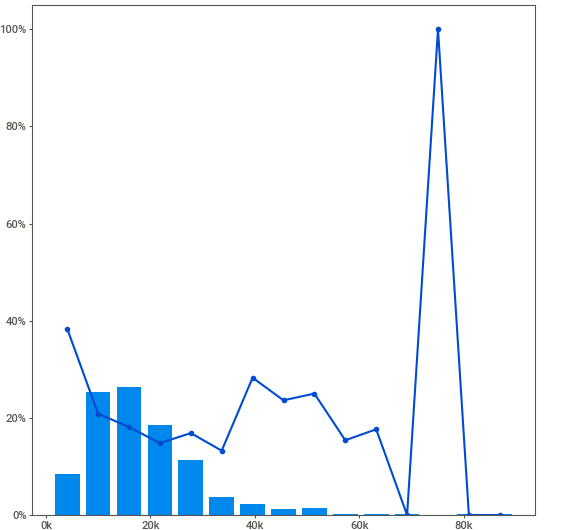
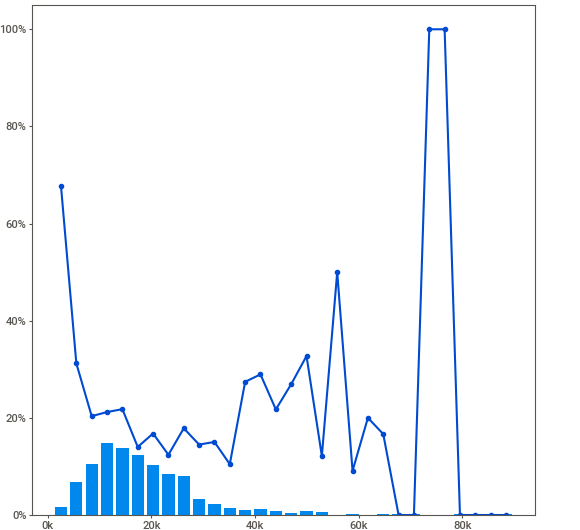
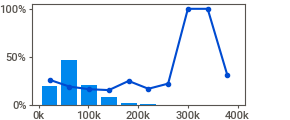
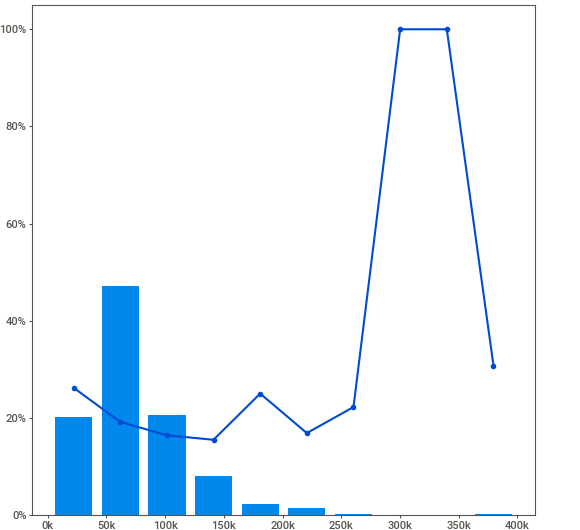
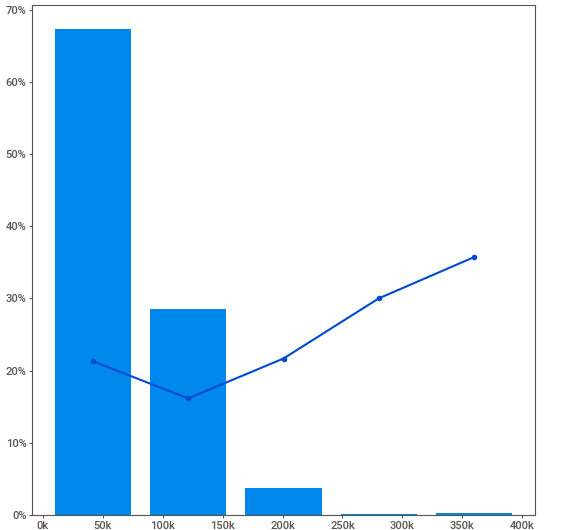
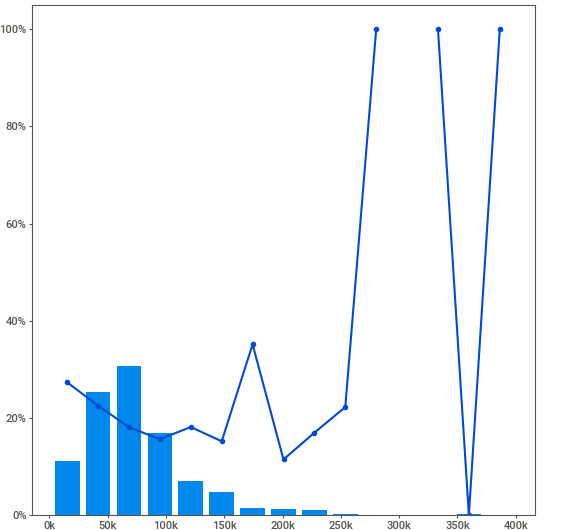
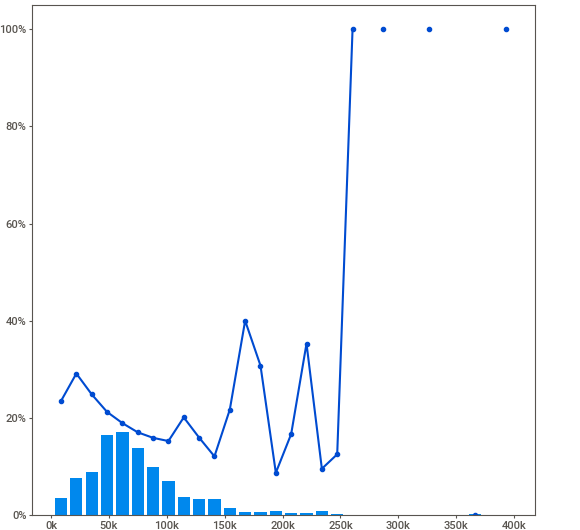
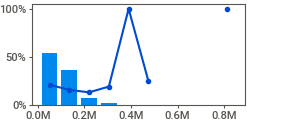
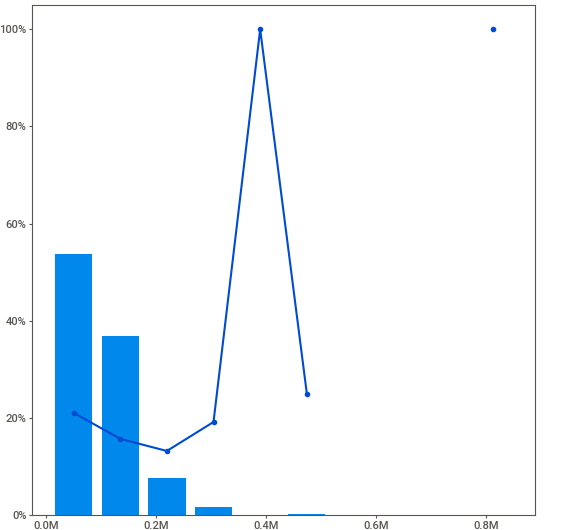
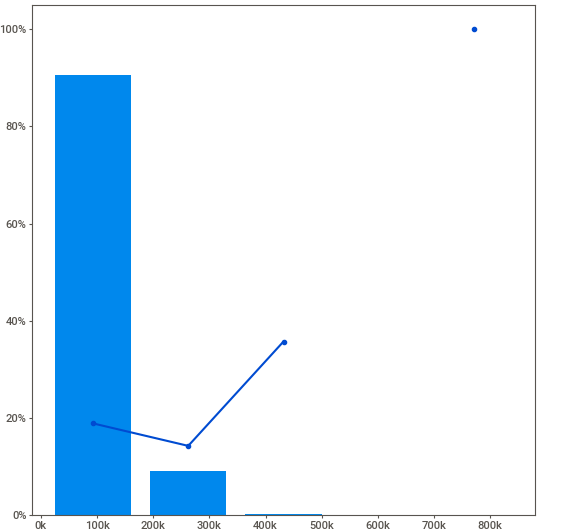
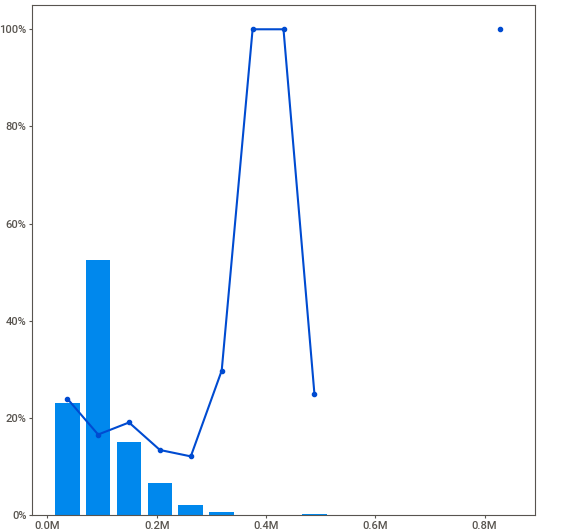
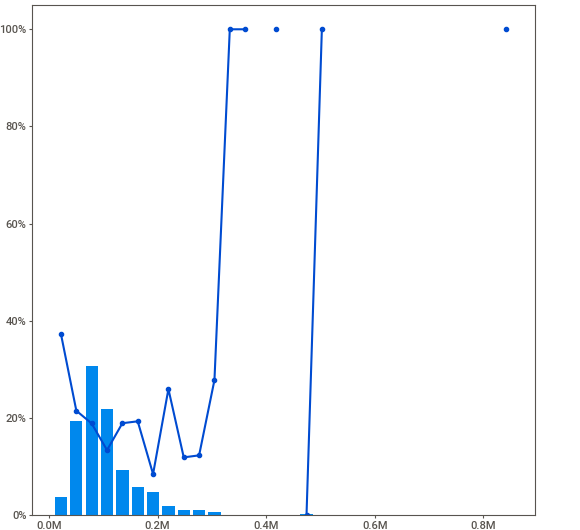
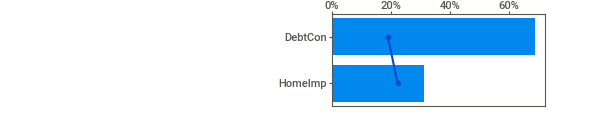
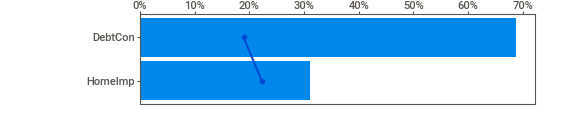
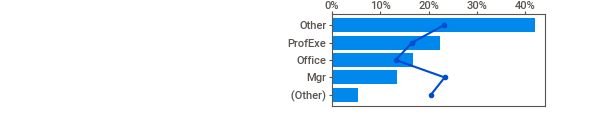
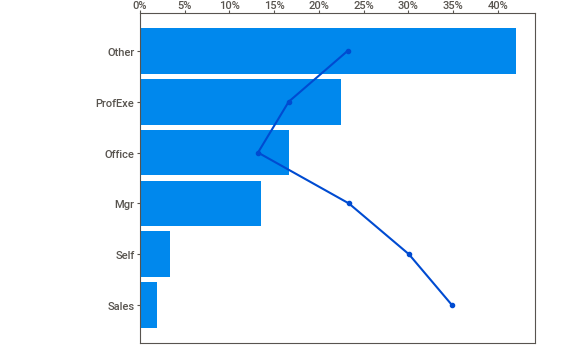
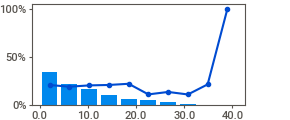
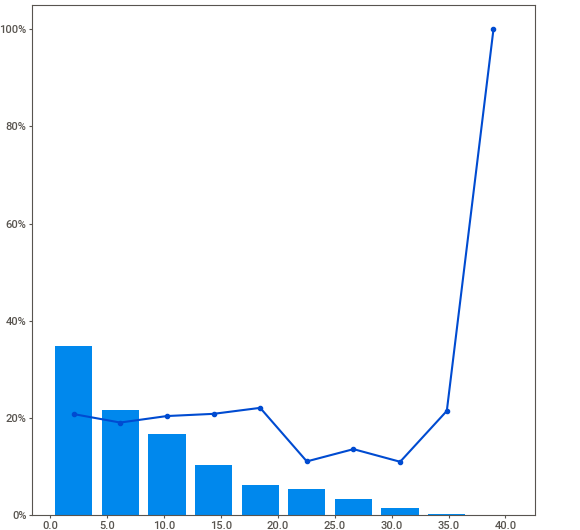
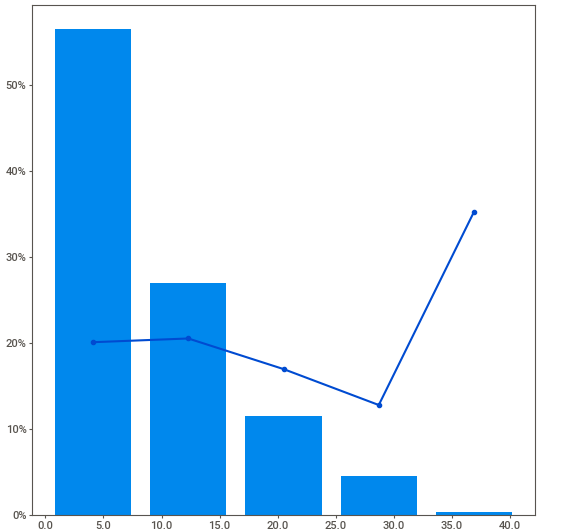
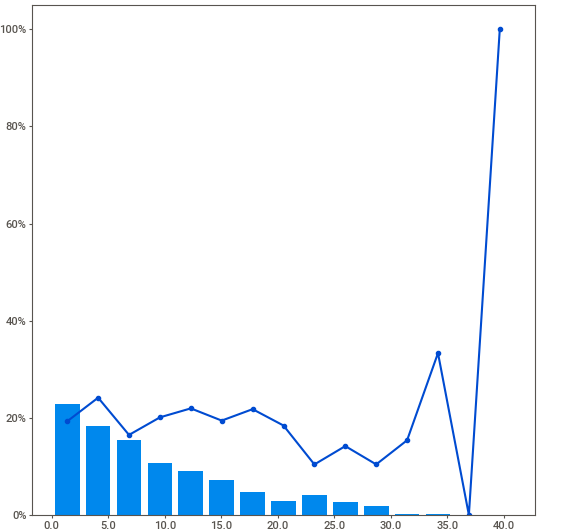
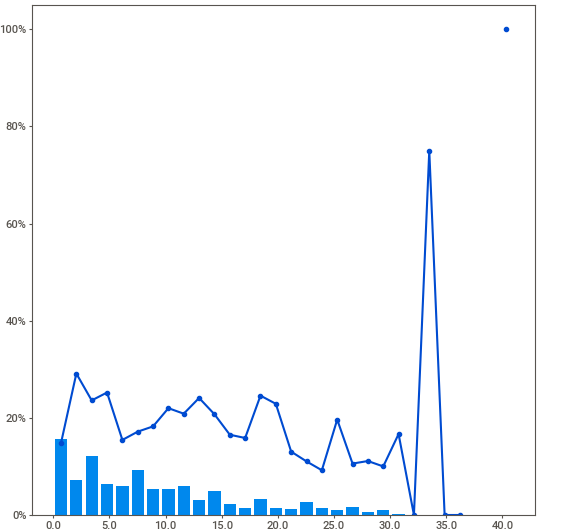
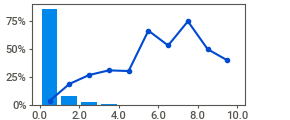
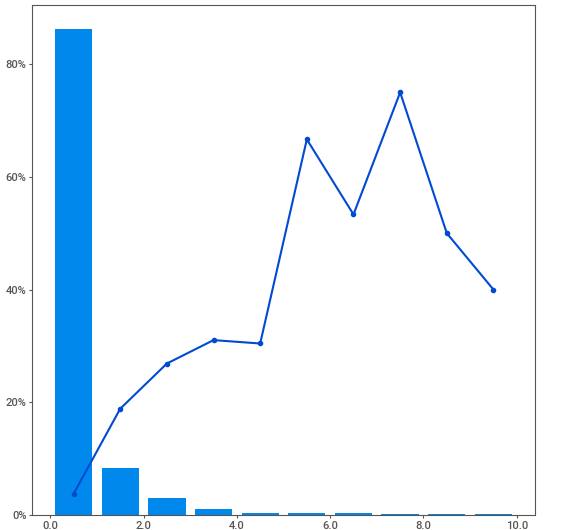
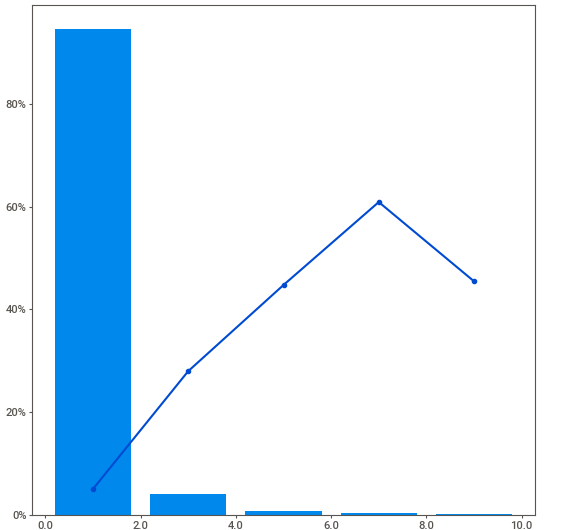
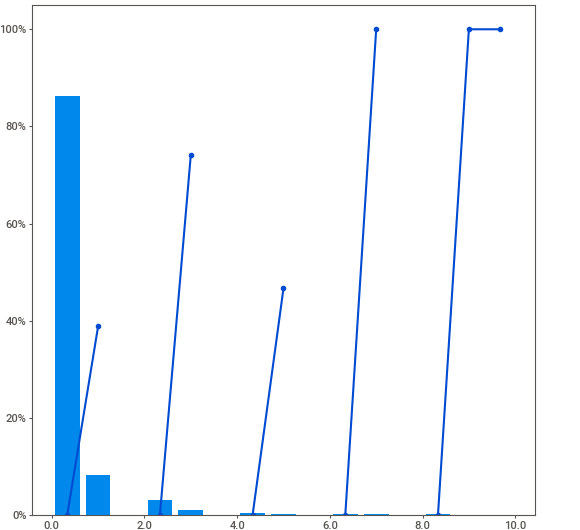
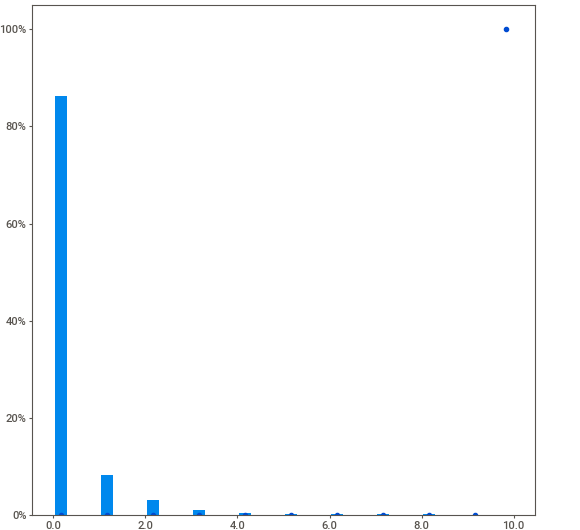
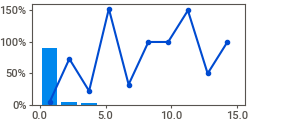
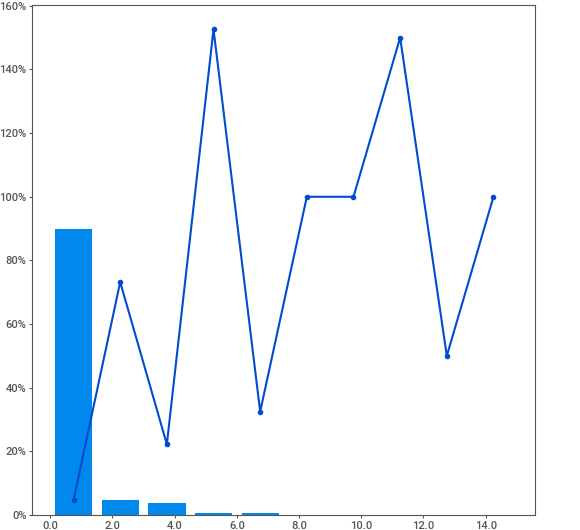
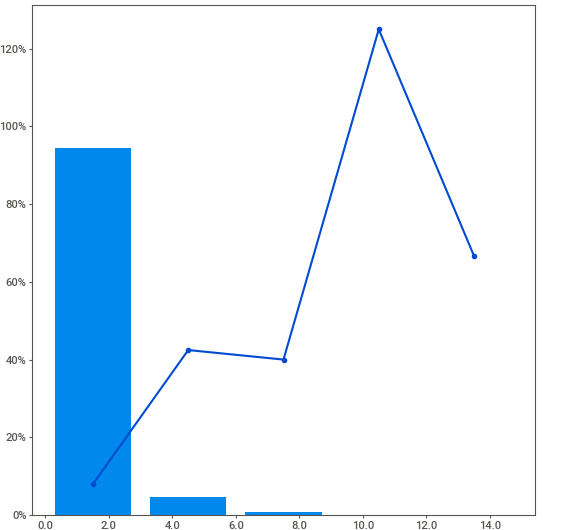
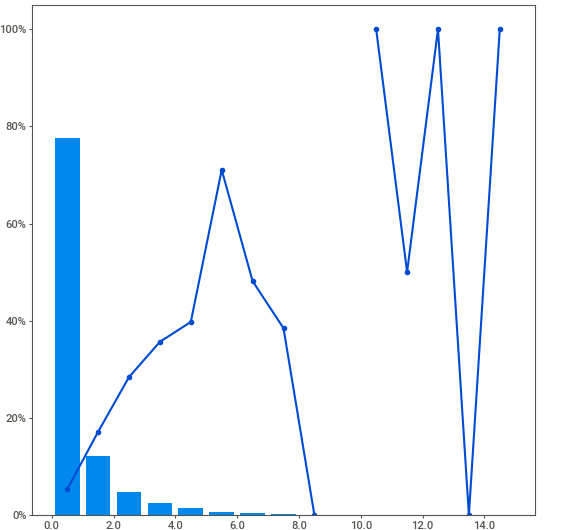
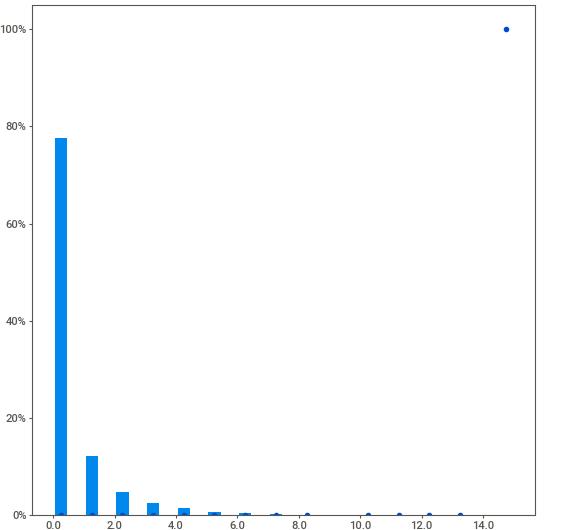
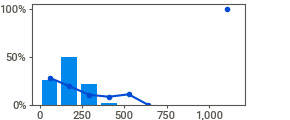
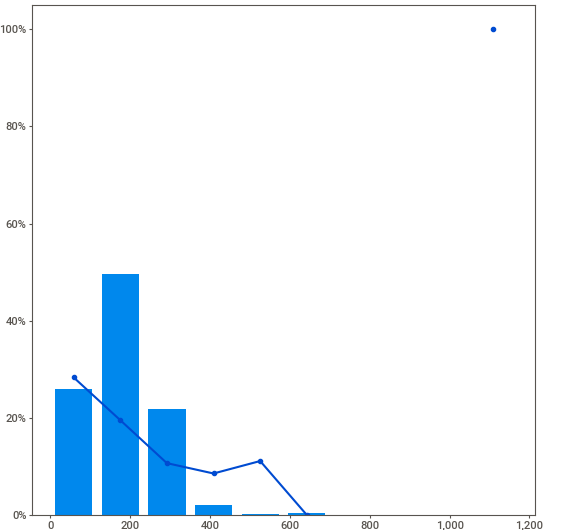
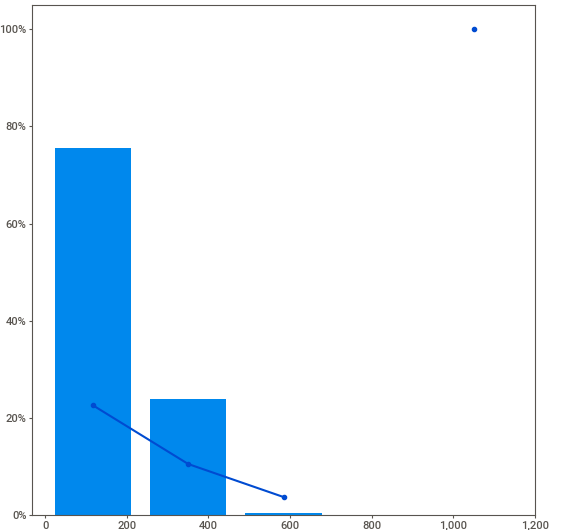
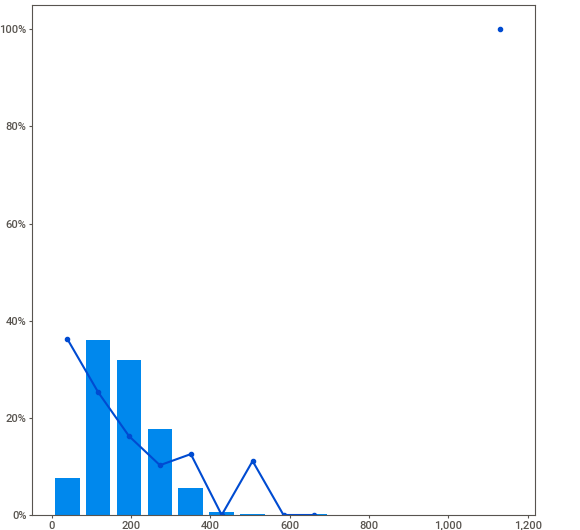
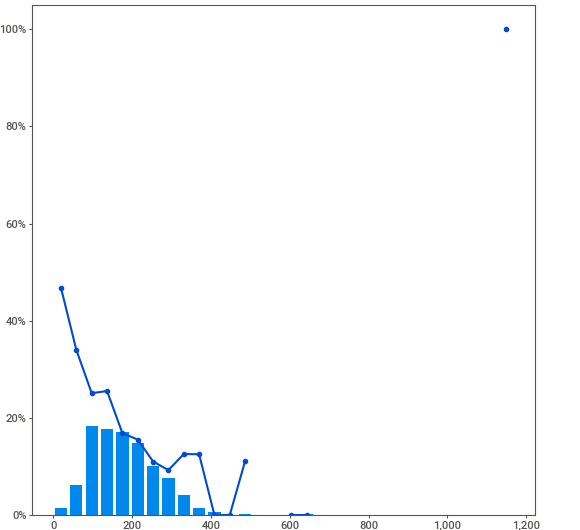
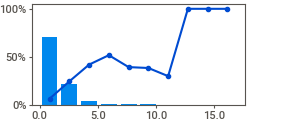
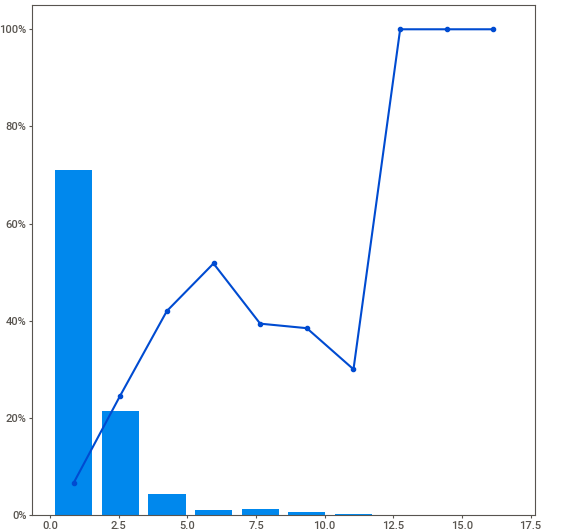
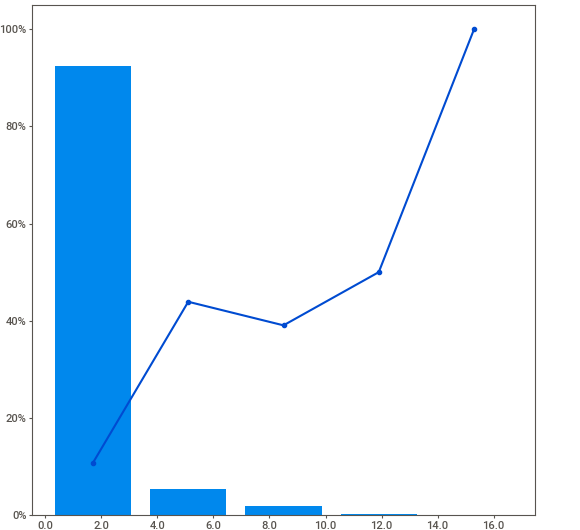
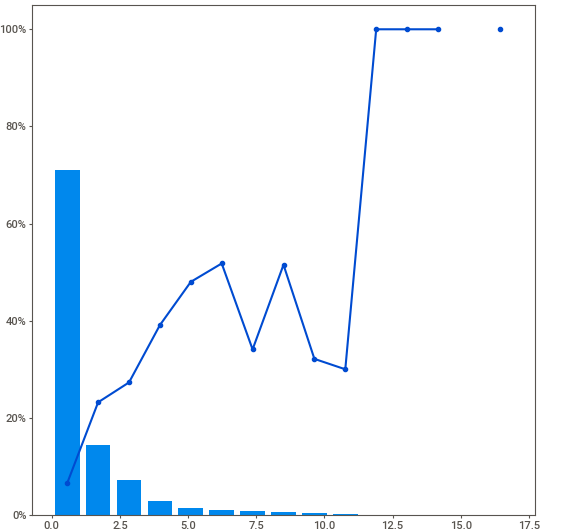
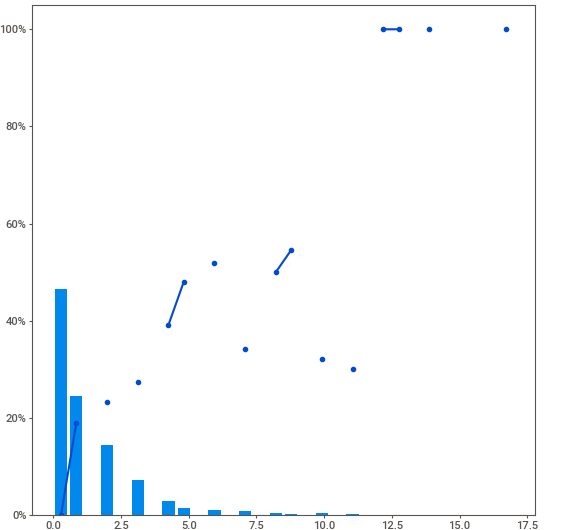
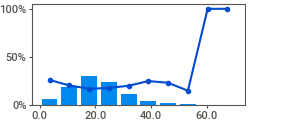
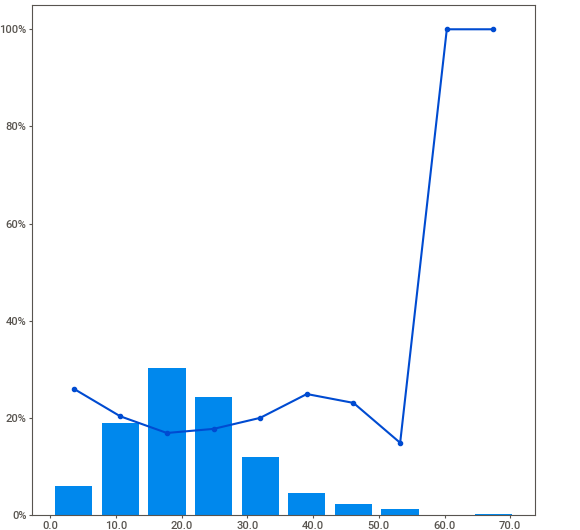
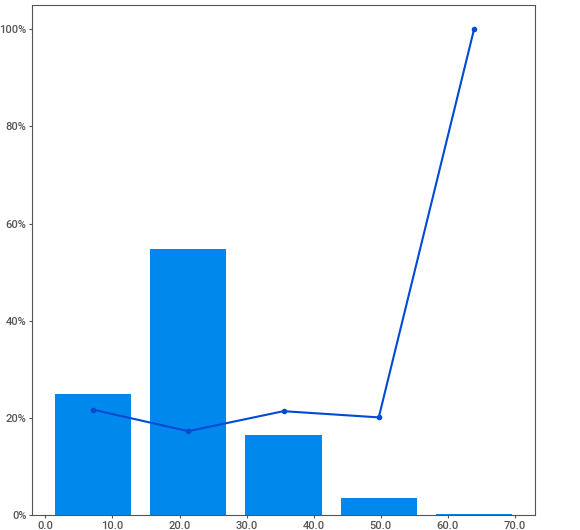
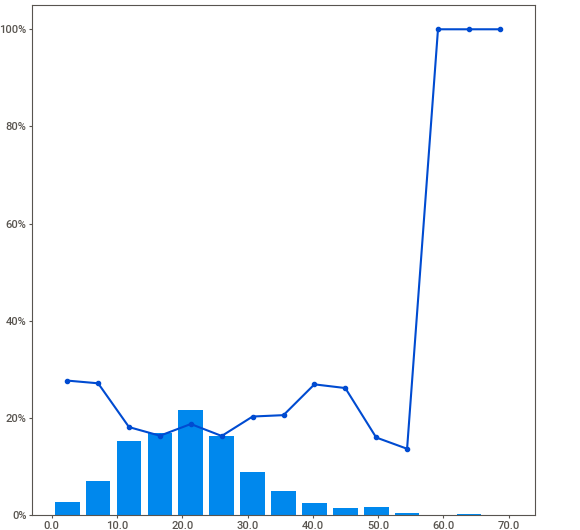
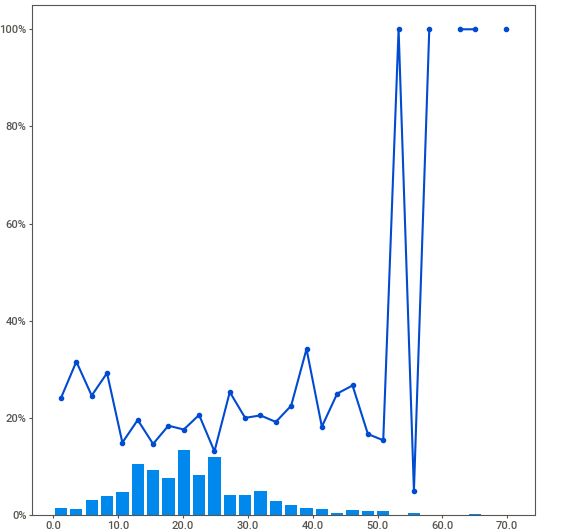
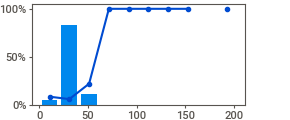
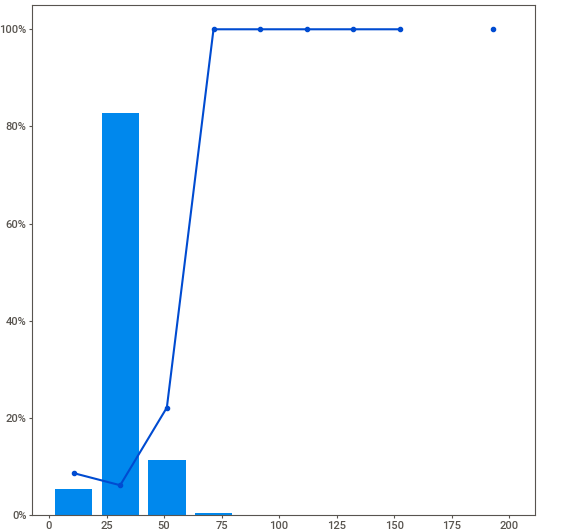
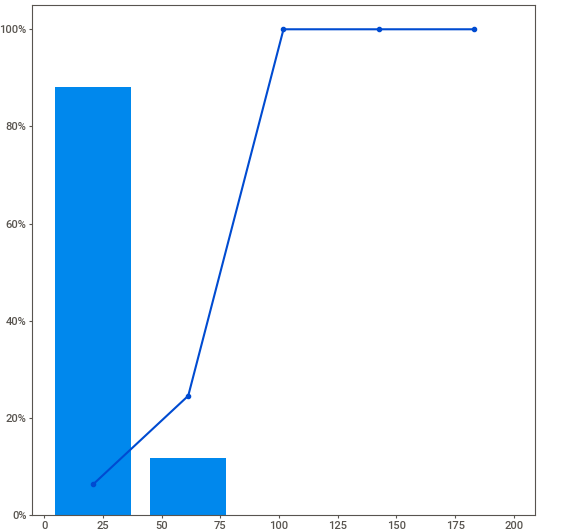
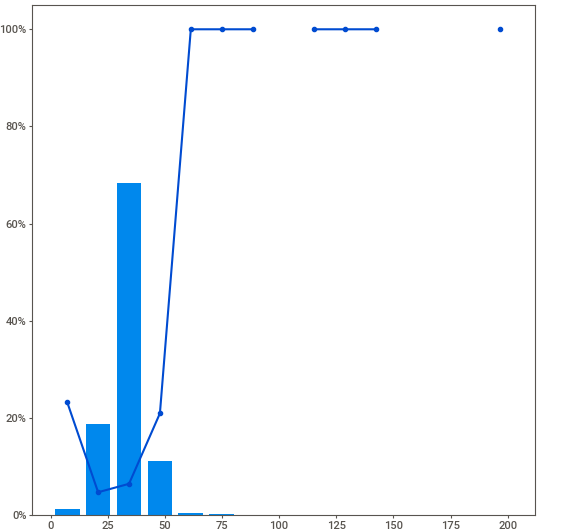
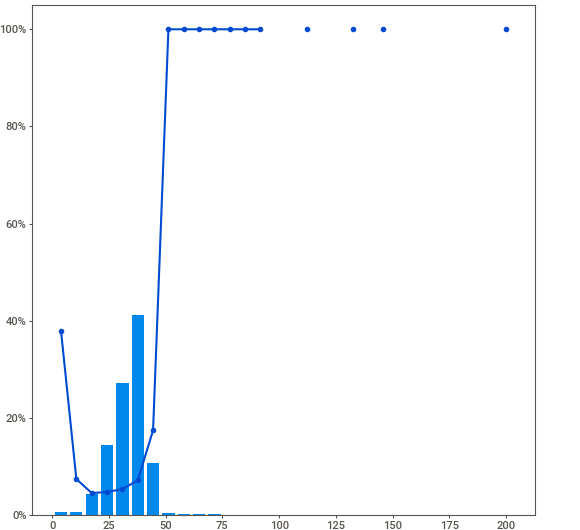
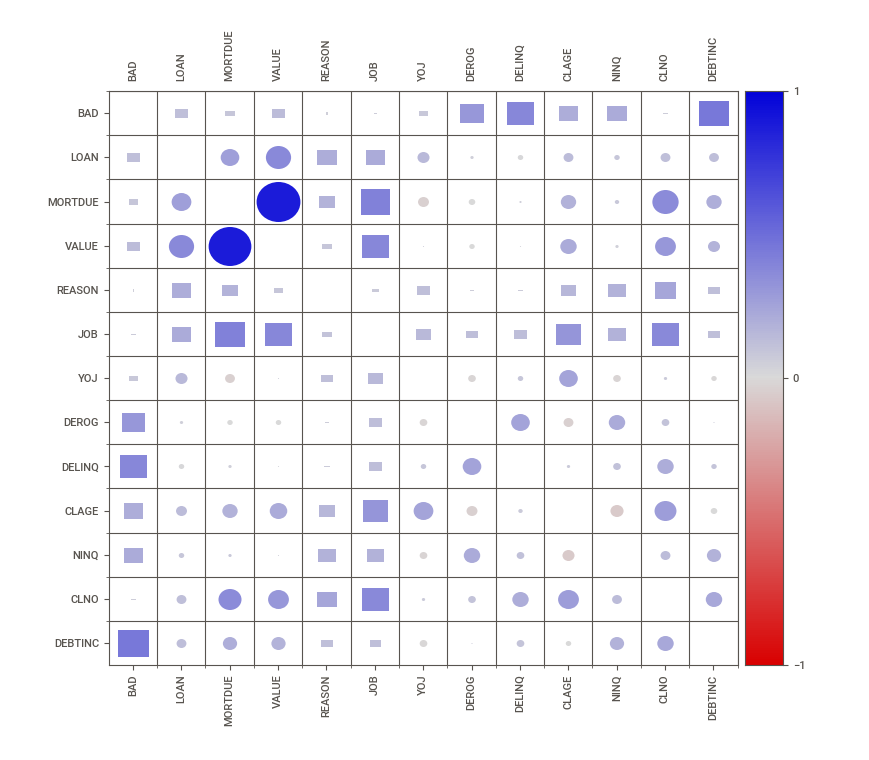
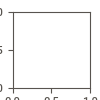

In [4]:
loan_report = sv.analyze(df, target_feat="BAD")
loan_report.show_notebook()

In [5]:
loan_report.show_html()

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


From HTML report

In [6]:
loan_av = AutoViz_Class()

Shows even for missing value look at "Distribution of Reason" it gives stats for null values

Looking at this we can impute values in each category separately or remove these records from dataset

"DEBTINC for each BAD" shows that people with high dti > 40 are more plausible to defaulr

Shape of your Data Set: (5960, 13)
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    Number of Numeric Columns =  9
    Number of Integer-Categorical Columns =  1
    Number of String-Categorical Columns =  1
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  1
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  0
    Number of Columns to Delete =  0
    12 Predictors classified...
        This does not include the Target column(s)
        No variables removed since no ID or low-information variables found in data set

################ Binary_Classification VISUALIZATION Started #####################
Data Set Shape: 5960 rows, 13 cols
Data Set columns info:
* LOAN: 0 nulls, 540 unique vals, most common: {15000: 105, 10000: 81}
* MORTDUE: 518 nulls, 

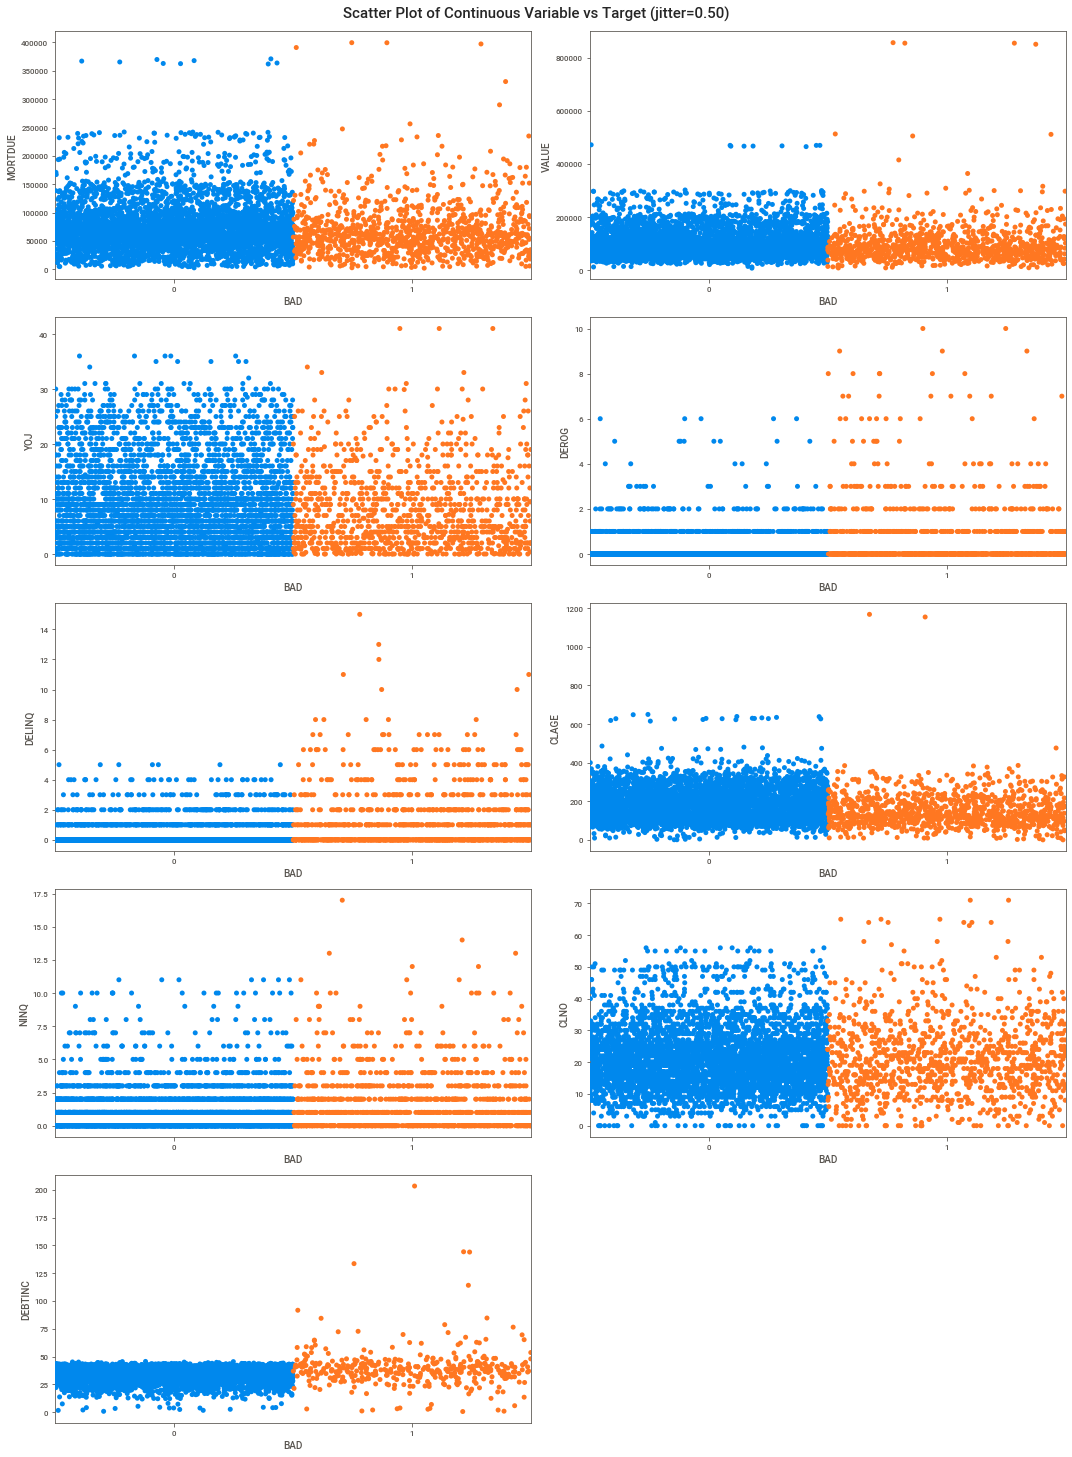

Total Number of Scatter Plots = 45


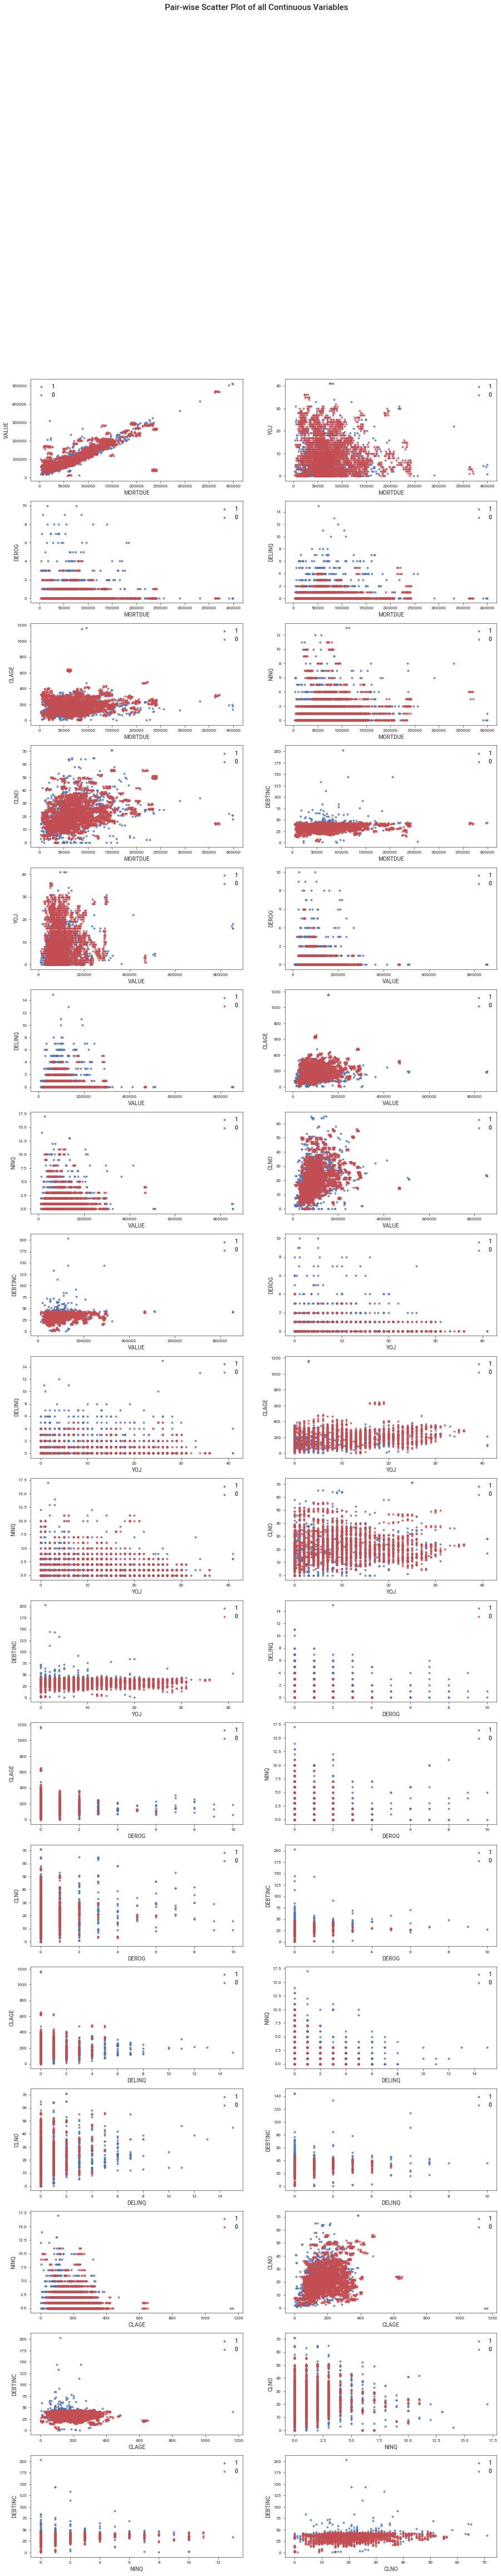

No handles with labels found to put in legend.
No handles with labels found to put in legend.


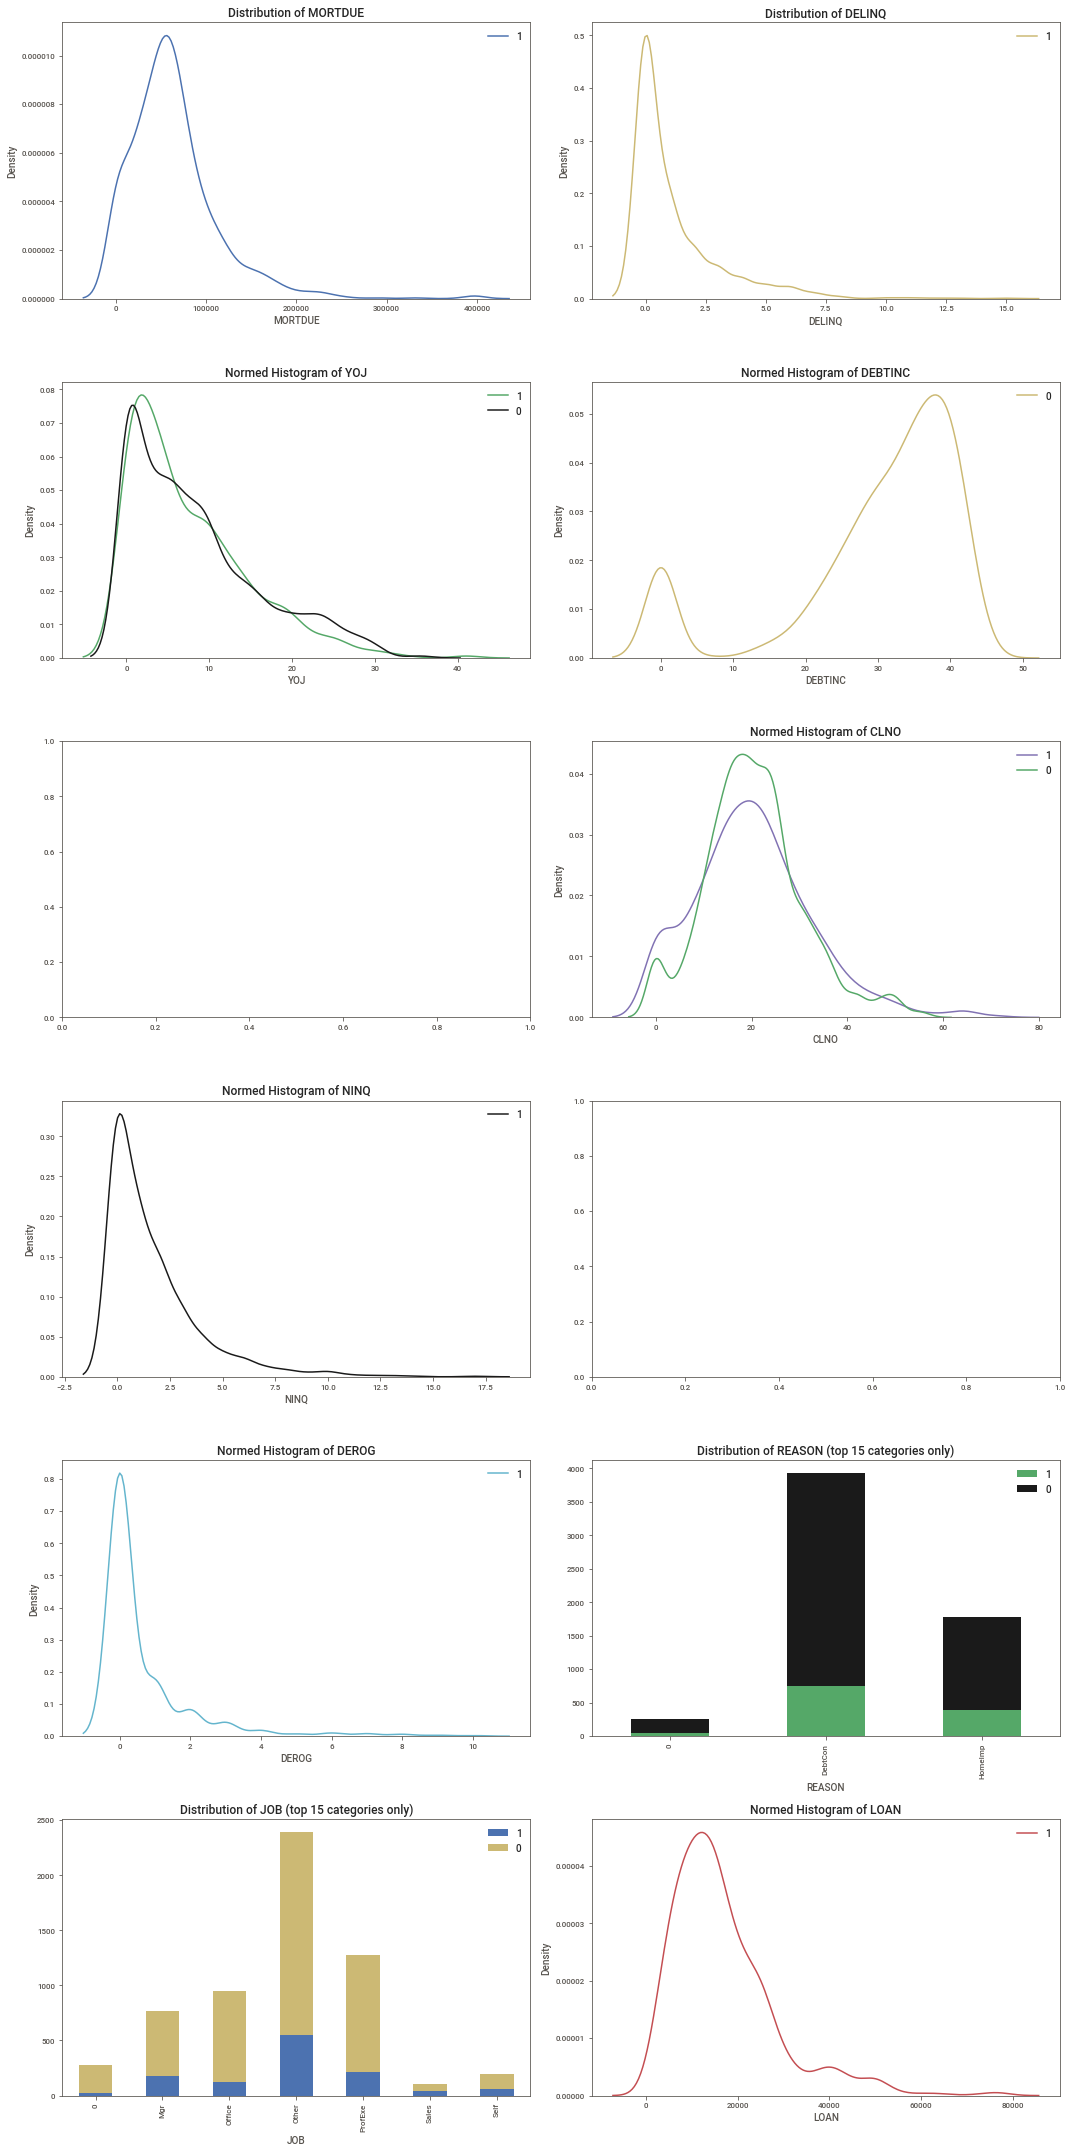

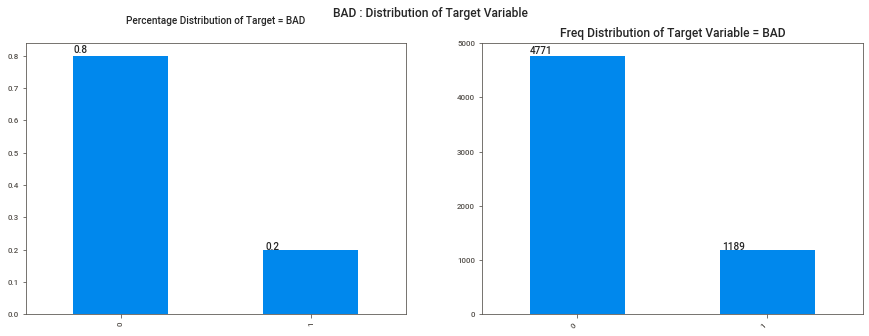

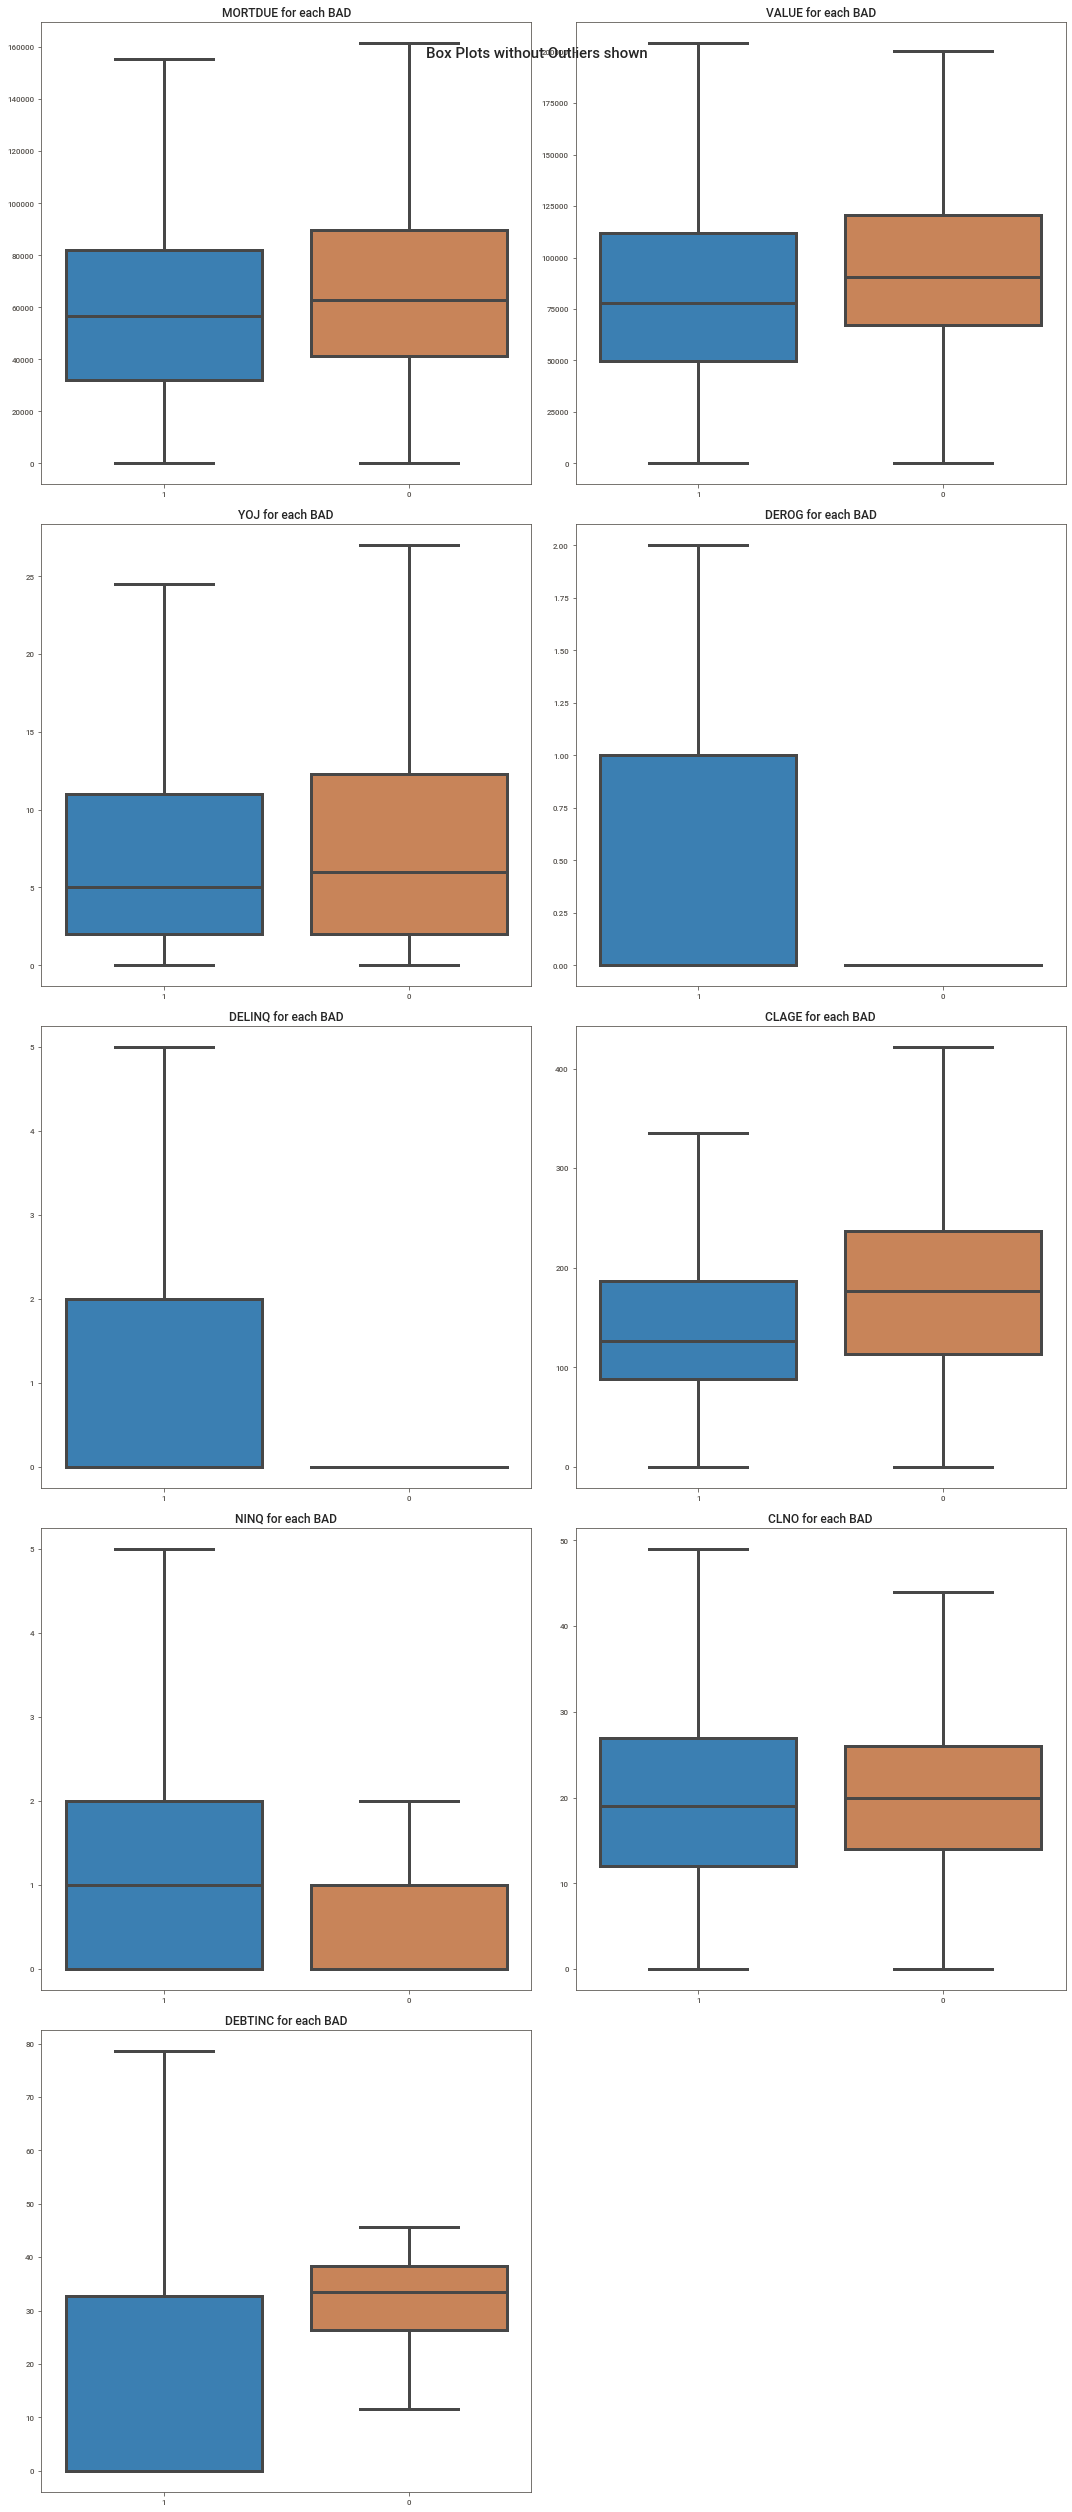

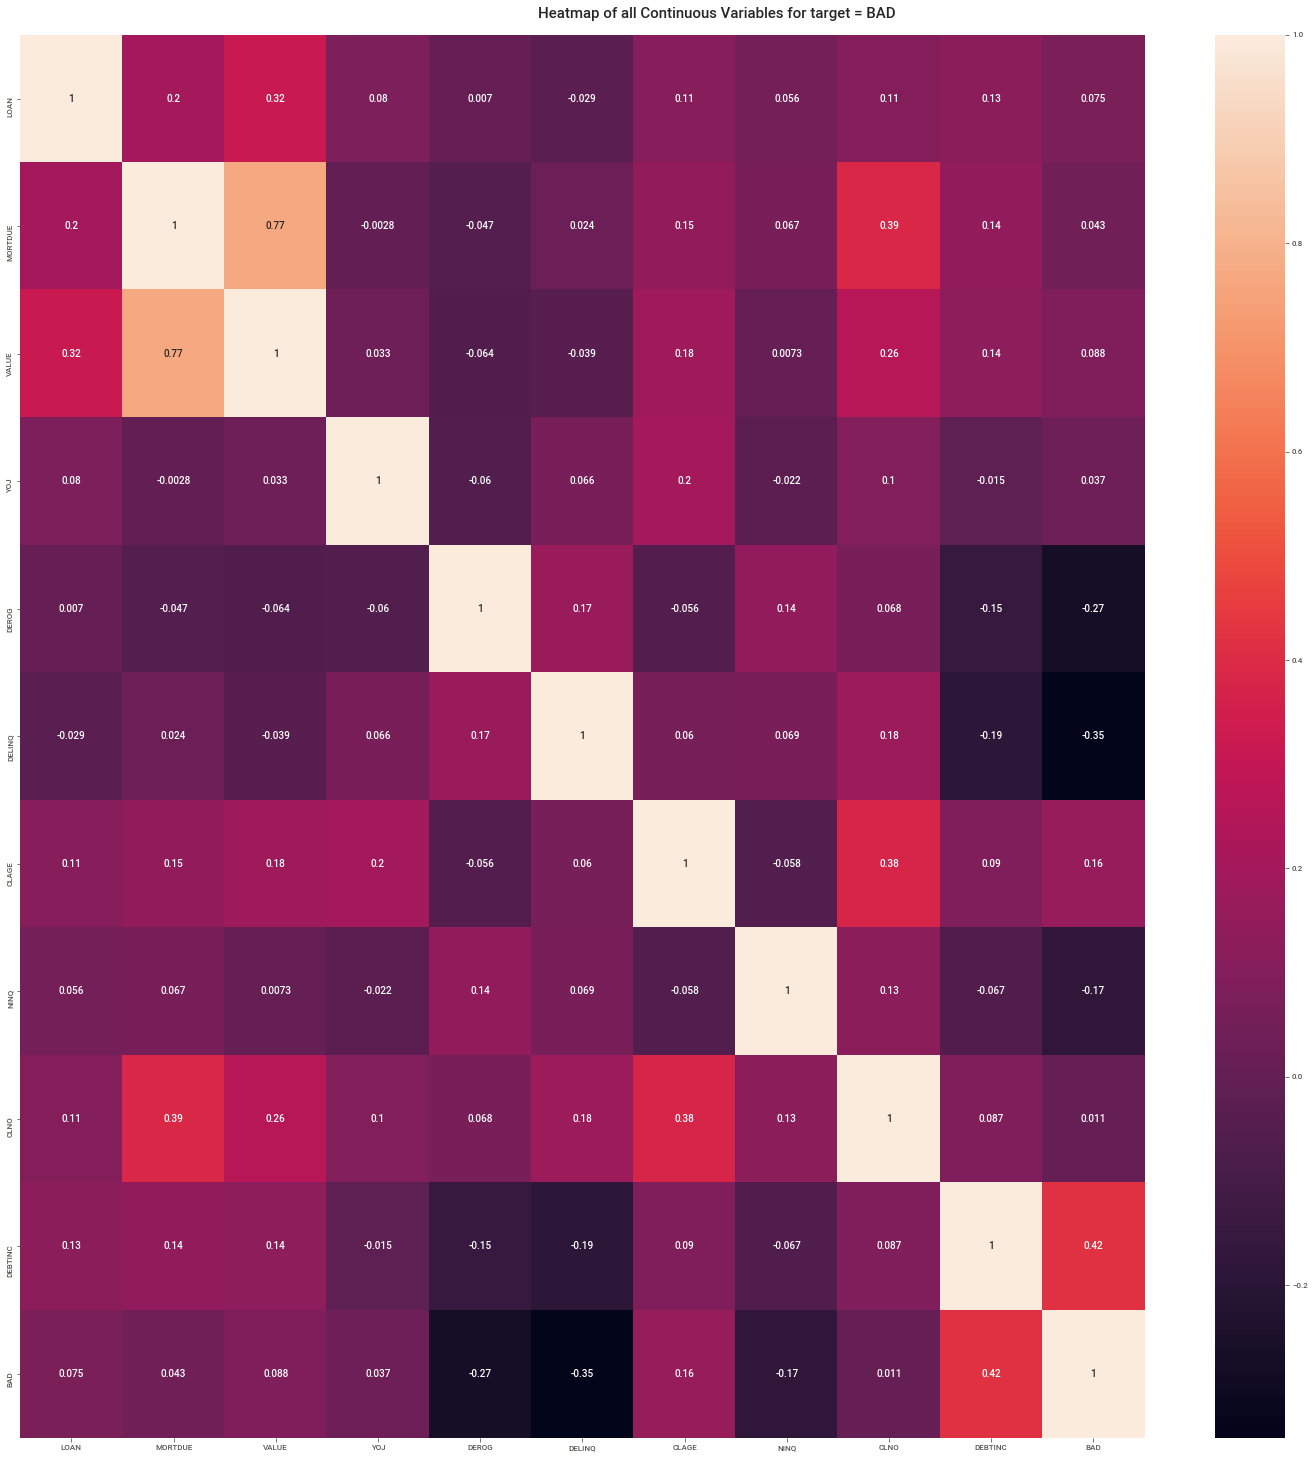

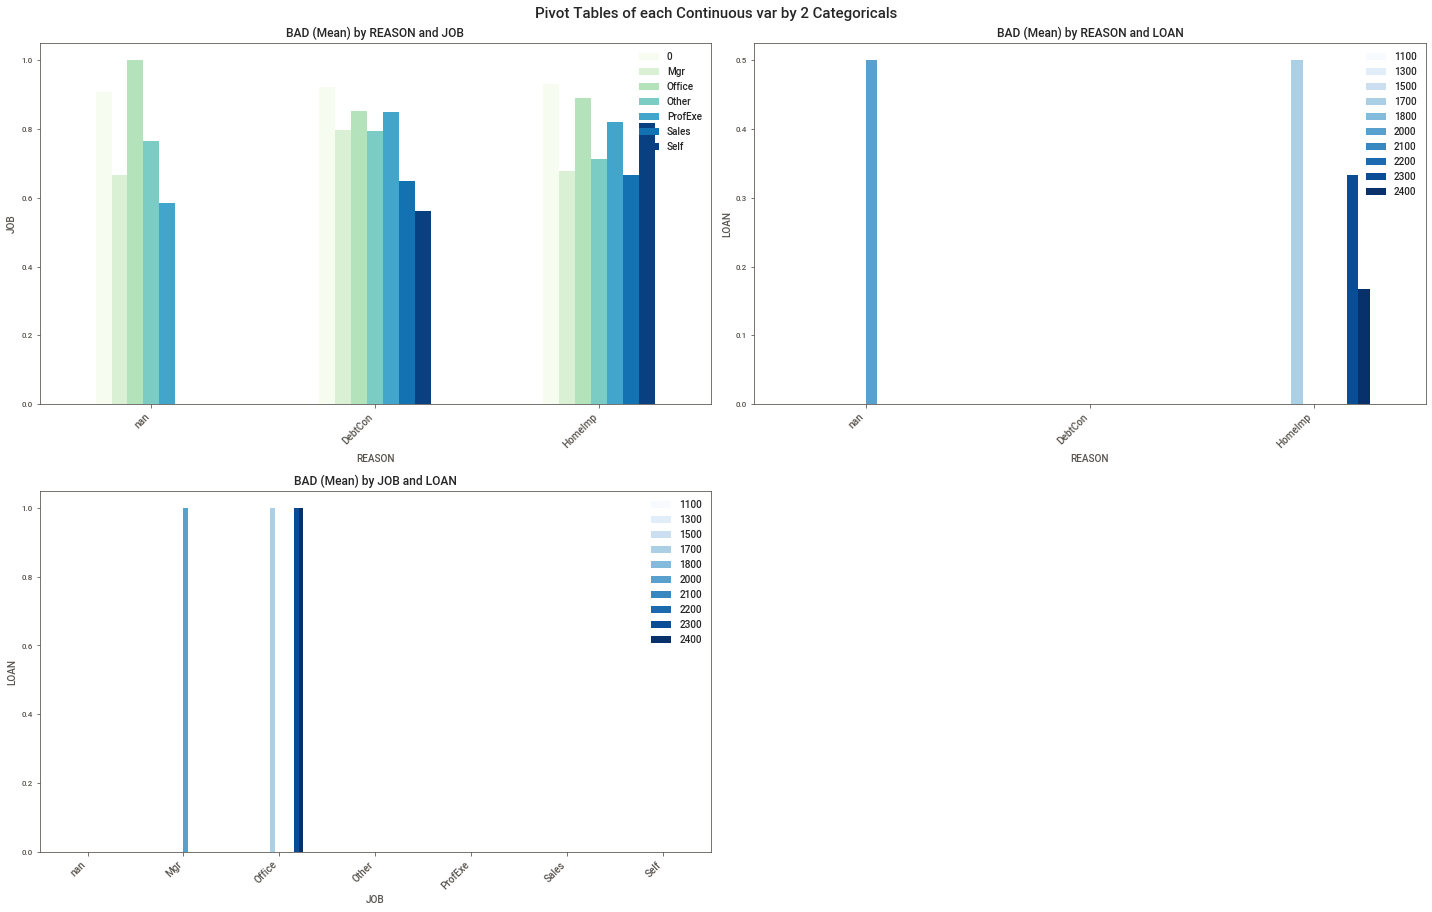

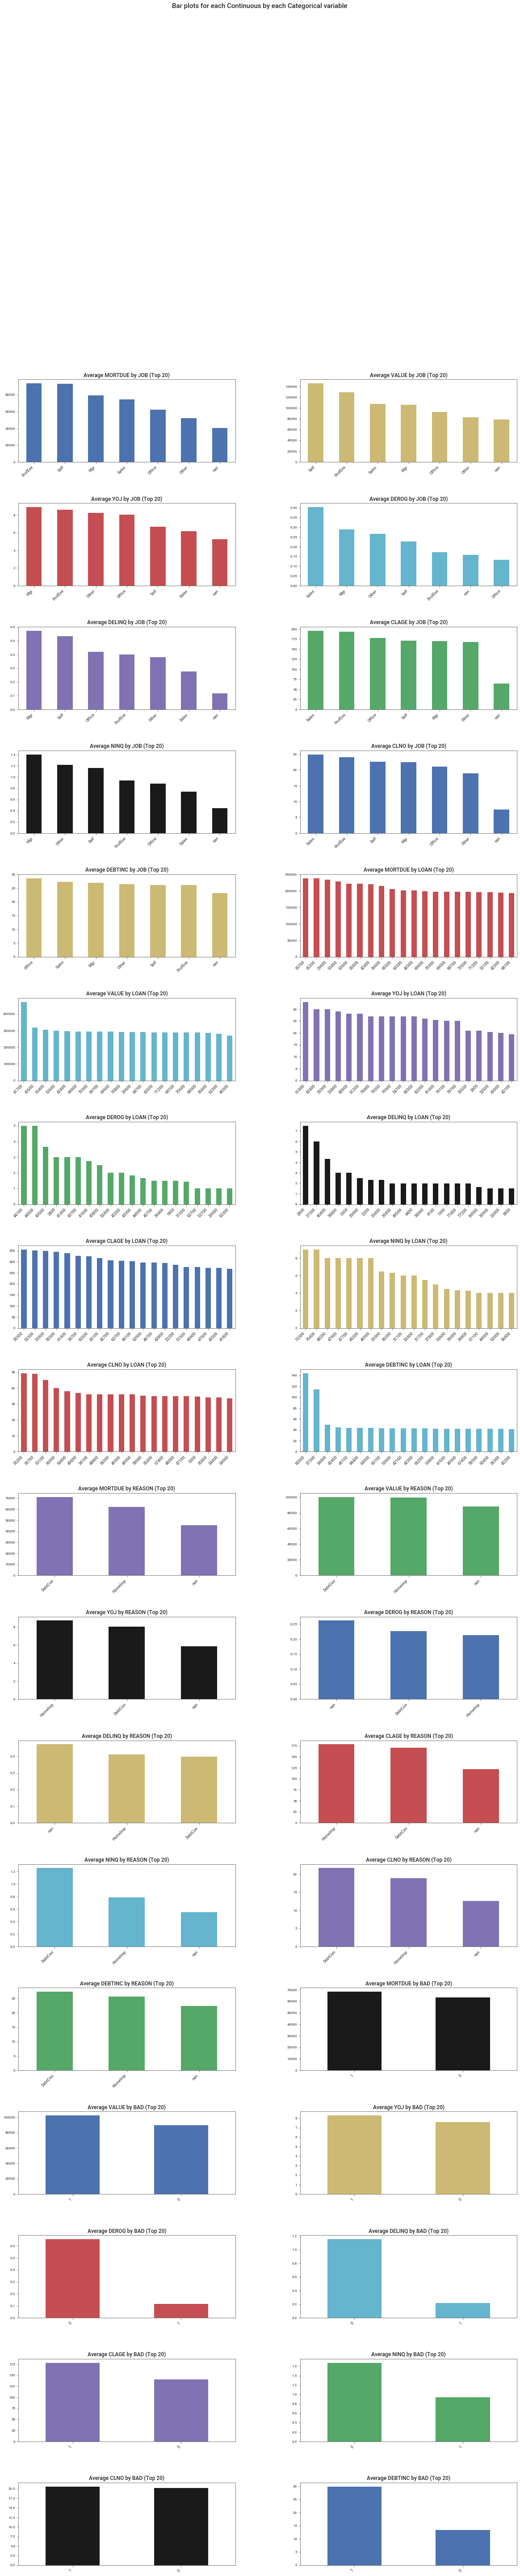

Time to run AutoViz (in seconds) = 22.799

 ###################### VISUALIZATION Completed ########################


In [8]:
dft = loan_av.AutoViz(filename='', dfte=df, verbose=1, depVar="BAD", lowess=False, chart_format="svg")

In [10]:
profile = ProfileReport(df, title="loan default report", explorative=True)

In [ ]:
profile.to_notebook_iframe()

In [12]:
profile.to_file("loan_report.html")

Summarize dataset:   0%|          | 0/26 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]